In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('WB_ESG_EN_ATM_CO2E_PC_WIDEF.csv')

In [43]:
df = df.drop(columns=[
    'INDICATOR',
    'INDICATOR_LABEL',
    'UNIT_MEASURE',
    'UNIT_MEASURE_LABEL',
    'DATABASE_ID',
    'DATABASE_ID_LABEL',
    'UNIT_MULT',
    'UNIT_MULT_LABEL',
    'OBS_STATUS',
    'OBS_STATUS_LABEL',
    'OBS_CONF',
    'OBS_CONF_LABEL',
    'FREQ',
    'FREQ_LABEL',
    'REF_AREA'
])

In [44]:
df = df.rename(columns={'REF_AREA_LABEL': 'Country'})

In [45]:
nations = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]

In [46]:
decade_1990 = [str(year) for year in range(1990, 2000)]
df_1990 = df.melt(
    id_vars='Country',
    value_vars=decade_1990,
    var_name='Year',
    value_name='CO2 Emissions'
)
df_1990 = df_1990.query('Country in @nations').reset_index(drop=True)
df_1990 = df_1990.groupby('Country')['CO2 Emissions'].median().reset_index()
df_1990['Decade'] = '1990s'

In [47]:
decade_2000 = [str(year) for year in range(2000, 2010)]
df_2000 = df.melt(
    id_vars='Country',
    value_vars=decade_2000,
    var_name='Year',
    value_name='CO2 Emissions'
)
df_2000 = df_2000.query('Country in @nations').reset_index(drop=True)
df_2000 = df_2000.groupby('Country')['CO2 Emissions'].median().reset_index()
df_2000['Decade'] = '2000'

In [48]:
decade_2010 = [str(year) for year in range(2010, 2019)]
df_2010 = df.melt(
    id_vars='Country',
    value_vars=decade_2010,
    var_name='Year',
    value_name='CO2 Emissions'
)
df_2010 = df_2010.query('Country in @nations').reset_index(drop=True)
df_2010 = df_2010.groupby('Country')['CO2 Emissions'].median().reset_index()
df_2010['Decade'] = '2010s'

In [49]:
df_all_decades = pd.concat([df_1990, df_2000, df_2010]).reset_index(drop=True)

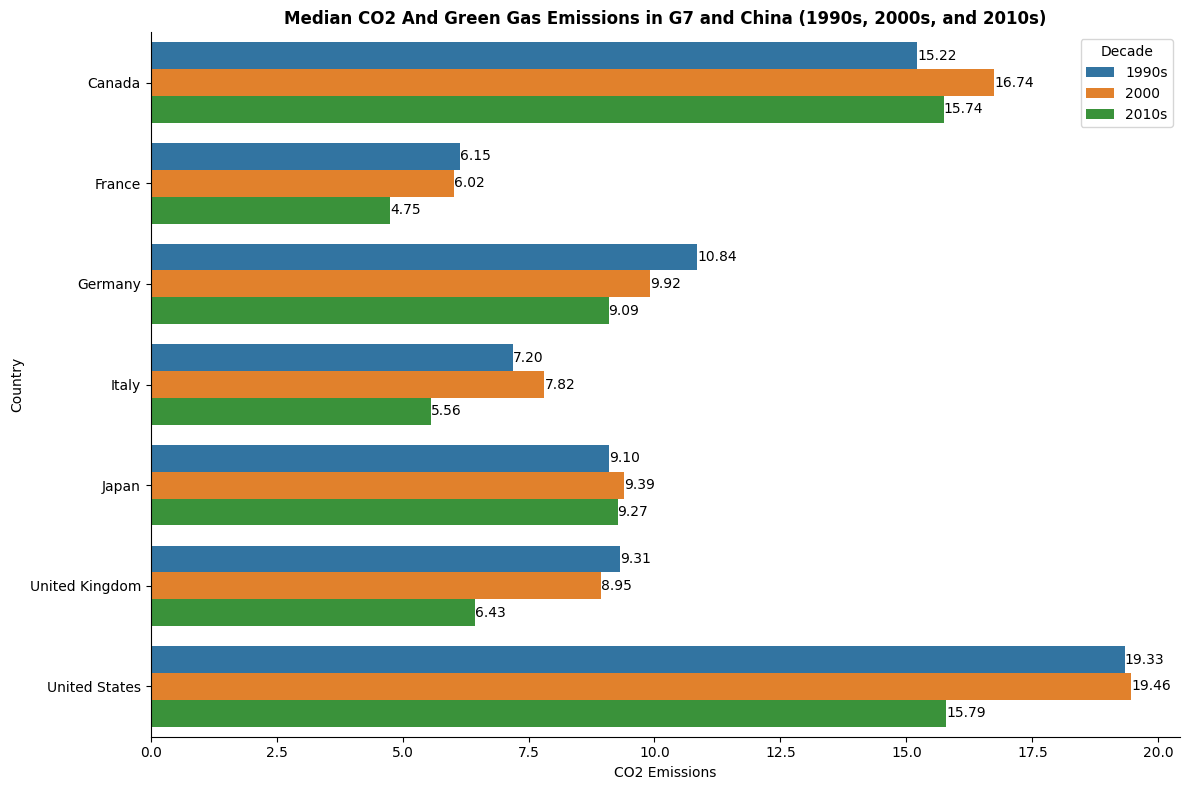

In [50]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    data=df_all_decades,
    x='CO2 Emissions',
    y='Country',
    orient='h',
    hue='Decade'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

sns.despine()
plt.title('Median CO2 And Green Gas Emissions in G7 and China (1990s, 2000s, and 2010s)', fontweight='bold')
plt.tight_layout()
plt.show()